In [17]:
import pandas as pd
import numpy as np

import random
# from random import randint
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None, 'display.max_columns', None)

In [3]:
df = pd.read_csv('AAPL_returns.csv')
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,returns
0,2021-01-04,133.610001,126.760002,133.520004,129.410004,143301900.0,127.874939,-0.024719
1,2021-01-05,131.740005,128.429993,128.889999,131.009995,97664900.0,129.455963,0.012364
2,2021-01-06,131.050003,126.379997,127.720001,126.599998,155088000.0,125.098267,-0.033662
3,2021-01-07,131.630005,127.860001,128.360001,130.919998,109578200.0,129.367035,0.034123
4,2021-01-08,132.630005,130.229996,132.429993,132.050003,105158200.0,130.483627,0.008631


In [28]:
df.isnull().any()

Date         False
High         False
Low          False
Open         False
Close        False
Volume       False
Adj Close    False
returns      False
Month        False
dtype: bool

In [33]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close,returns
count,62.000000,62.000000,62.000000,62.000000,6.200000e+01,62.000000,62.000000
mean,129.977904,126.597742,128.532581,128.271613,1.096714e+08,126.866392,-0.000987
std,6.696031,6.500335,6.705765,6.738133,2.964228e+07,6.610091,0.020753
min,120.400002,116.209999,119.029999,116.360001,6.014510e+07,115.151558,-0.041673
25%,123.902502,120.587502,122.647497,121.984999,8.894782e+07,120.718130,-0.014778
50%,129.860001,126.810001,128.385002,127.810001,1.034714e+08,126.388264,-0.001658
75%,135.710003,132.324993,134.212505,133.752502,1.196941e+08,132.215115,0.011957
max,145.089996,141.369995,143.600006,143.160004,1.855495e+08,141.461838,0.053851


In [22]:
df['Date'] = pd.to_datetime(df['Date'])
# df['Month'] = df['Date'].dt.to_period('M')
# df.head()

In [32]:
df.set_index(df['Date'])

,Date,High,Low,Open,Close,Volume,Adj Close,returns
Date,,,,,,,,
2021-01-04,2021-01-04,133.610001,126.760002,133.520004,129.410004,143301900.0,127.874939,-0.024719
2021-01-05,2021-01-05,131.740005,128.429993,128.889999,131.009995,97664900.0,129.455963,0.012364
2021-01-06,2021-01-06,131.050003,126.379997,127.720001,126.599998,155088000.0,125.098267,-0.033662
2021-01-07,2021-01-07,131.630005,127.860001,128.360001,130.919998,109578200.0,129.367035,0.034123
2021-01-08,2021-01-08,132.630005,130.229996,132.429993,132.050003,105158200.0,130.483627,0.008631
...,...,...,...,...,...,...,...,...
2021-03-26,2021-03-26,121.480003,118.919998,120.349998,121.209999,94071200.0,119.951202,0.005142
2021-03-29,2021-03-29,122.580002,120.730003,121.650002,121.389999,80819200.0,120.129311,0.001485
2021-03-30,2021-03-30,120.400002,118.860001,120.110001,119.900002,85671900.0,118.654793,-0.012274


<AxesSubplot:>

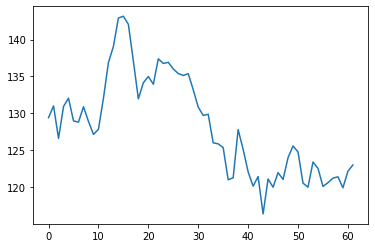

In [34]:
df_close = df['Close']
df_close.plot()

In [40]:
### Testing For Stationarity

#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(stock):
    result = adfuller(stock)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value, label in zip(result, labels):
        print(f'{label} : {value}')
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [41]:
adfuller_test(df['Close'])

ADF Test Statistic : -1.4257934693631826
p-value : 0.5698498588724081
#Lags Used : 0
Number of Observations Used : 61
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [43]:
df['Close First Difference'] = df['Close'] - df['Close'].shift(1)
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,returns,Close First Difference
0,2021-01-04,133.610001,126.760002,133.520004,129.410004,143301900.0,127.874939,-0.024719,NaN
1,2021-01-05,131.740005,128.429993,128.889999,131.009995,97664900.0,129.455963,0.012364,1.599991
2,2021-01-06,131.050003,126.379997,127.720001,126.599998,155088000.0,125.098267,-0.033662,-4.409996
3,2021-01-07,131.630005,127.860001,128.360001,130.919998,109578200.0,129.367035,0.034123,4.320000
4,2021-01-08,132.630005,130.229996,132.429993,132.050003,105158200.0,130.483627,0.008631,1.130005


In [46]:
adfuller_test(df['Close First Difference'].dropna())

ADF Test Statistic : -4.450846445998112
p-value : 0.00024101397051561323
#Lags Used : 4
Number of Observations Used : 56
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:>

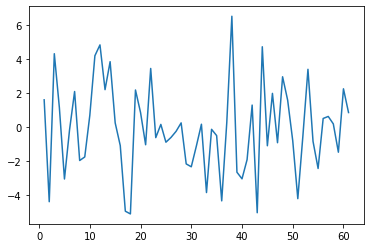

In [47]:
df['Close First Difference'].plot()

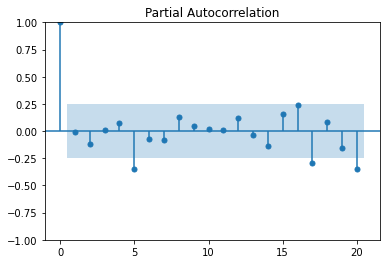

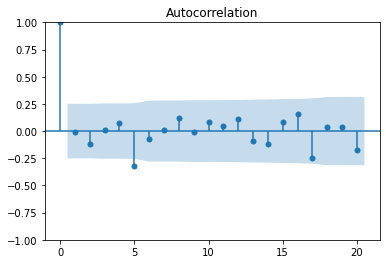

In [57]:
pacf = plot_pacf(df['Close First Difference'].dropna(), lags = 20)
acf = plot_acf(df['Close First Difference'].dropna(), lags = 20)

,Date,High,Low,Open,Close,Volume,Adj Close,returns,action
0,2021-01-04,133.610001,126.760002,133.520004,129.410004,143301900.0,127.874939,-0.024719,1000
1,2021-01-05,131.740005,128.429993,128.889999,131.009995,97664900.0,129.455963,0.012364,-1000
2,2021-01-06,131.050003,126.379997,127.720001,126.599998,155088000.0,125.098267,-0.033662,1000
3,2021-01-07,131.630005,127.860001,128.360001,130.919998,109578200.0,129.367035,0.034123,1000
4,2021-01-08,132.630005,130.229996,132.429993,132.050003,105158200.0,130.483627,0.008631,-1000


In [115]:
profit

690059.4482421875

In [116]:
# Here we use minimum transaction size, and only keep that size with 100 shares
# 1: Buy stocks
# 2: Sell stocks
def random_trading(d):
    stock_cap = 500
    stocks = 0
    for i in range(len(d)-1):
        trading = random.randint(0, 2)
        if trading == 0:
            d.loc[i, 'trading'] = 0
        elif (stocks == 0)  & (trading == 1):
            stocks += 100
            d.loc[i, 'trading'] = 100
        elif (stocks > 0) & (trading == 2):
            stocks -= 100
            d.loc[i, 'trading'] = -100
        else:
            d.loc[i, 'trading'] = 0
    
    # If we still have stocks in the last round then sell it
    if stocks > 0:
        d.loc[len(d)-1, 'trading'] = -100
    else:
        d.loc[len(d)-1, 'trading'] = 0
            
    d['trading'] = d['trading'].astype(int)
    return d

In [119]:
result = random_trading(df)
result
# sum(result['trading'])

,Date,High,Low,Open,Close,Volume,Adj Close,returns,trading
0,2021-01-04,133.610001,126.760002,133.520004,129.410004,143301900.0,127.874939,-0.024719,0
1,2021-01-05,131.740005,128.429993,128.889999,131.009995,97664900.0,129.455963,0.012364,0
2,2021-01-06,131.050003,126.379997,127.720001,126.599998,155088000.0,125.098267,-0.033662,0
3,2021-01-07,131.630005,127.860001,128.360001,130.919998,109578200.0,129.367035,0.034123,0
4,2021-01-08,132.630005,130.229996,132.429993,132.050003,105158200.0,130.483627,0.008631,0
5,2021-01-11,130.169998,128.500000,129.190002,128.979996,100384500.0,127.450043,-0.023249,0
6,2021-01-12,129.690002,126.860001,128.500000,128.800003,91951100.0,127.272194,-0.001395,0
7,2021-01-13,131.449997,128.490005,128.759995,130.889999,88636800.0,129.337402,0.016227,0
8,2021-01-14,131.000000,128.759995,130.800003,128.910004,90221800.0,127.380882,-0.015127,0
9,2021-01-15,130.220001,127.000000,128.779999,127.139999,111598500.0,125.631866,-0.013731,0


In [8]:
def stock_returns_calculation(d):
    stock_returns = 0
    for i in range(len(d)):
        stock_returns += d.loc[i, 'Adj Close'] * d.loc[i, 'trading'] * -1
        
    return stock_returns

In [505]:
stock_returns_calculation(random_trading(df.copy()))

684.3658447265607

In [559]:
def average_random_trading():
    total_random_returns = 0
    for i in range(10):
        df_random_trading = random_trading(df.copy())
        random_returns = stock_returns_calculation(df_random_trading)
        total_random_returns += random_returns
        print(f'Random Return: {random_returns}')

    return total_random_returns / 10

print(f'Average Returns of Random Trading: {average_random_trading()}')

Random Return: 395.20263671875
Random Return: -2937.001800537113
Random Return: 1814.2761230468714
Random Return: 11.875152587896082
Random Return: 106.45141601562136
Random Return: 390.6974792480487
Random Return: 82.60955810546693
Random Return: 916.4222717285156
Random Return: 42.71011352539426
Random Return: -649.7589111328125
Average Returns of Random Trading: 17.34840393066388


In [21]:
def average_random_trading():
    total_random_returns = 0
    for i in range(1000):
        df_random_trading = random_trading(df.copy())
        random_returns = stock_returns_calculation(df_random_trading)
        total_random_returns += random_returns
#         print(f'Random Return: {random_returns}')

    return total_random_returns / 1000

print(f'Average Returns of Random Trading: {average_random_trading()}')

Average Returns of Random Trading: -367.25767364501945


In [22]:
def average_random_trading():
    total_random_returns = 0
    for i in range(1000):
        df_random_trading = random_trading(df.copy())
        random_returns = stock_returns_calculation(df_random_trading)
        total_random_returns += random_returns
#         print(f'Random Return: {random_returns}')

    return total_random_returns / 1000

print(f'Average Returns of Random Trading: {average_random_trading()}')

Average Returns of Random Trading: -299.90490112304684


In [87]:
def average_random_trading():
    total_random_returns = 0
    for i in range(1000):
        df_random_trading = random_trading(df.copy())
        random_returns = stock_returns_calculation(df_random_trading)
        total_random_returns += random_returns
        print(f'Random Return: {random_returns}')

    return total_random_returns / 1000

print(f'Average Returns of Random Trading: {average_random_trading()}')

Random Return: -1260.279846191408
Random Return: -1302.6710510253906
Random Return: -1002.0858764648419
Random Return: -630.9974670410174
Random Return: 1450.916290283205
Random Return: -408.9599609375
Random Return: 544.364166259762
Random Return: -1115.0596618652326
Random Return: 586.0404968261773
Random Return: -1112.0918273925745
Random Return: 1173.6793518066406
Random Return: -1768.5798645019568
Random Return: -624.57809448242
Random Return: -1369.0025329589862
Random Return: -280.87539672851744
Random Return: -89.24789428710756
Random Return: -1117.8001403808576
Random Return: 228.13262939453307
Random Return: -860.7765197753888
Random Return: -1296.0693359374982
Random Return: -829.605865478512
Random Return: 167.28591918945494
Random Return: 587.9089355468714
Random Return: 678.2516479492169
Random Return: 633.1130981445331
Random Return: 18.236541748048694
Random Return: 1117.3721313476544
Random Return: -1417.2187805175781
Random Return: -1287.6708984374964
Random Return: -

Random Return: -511.4486694335901
Random Return: -1033.3679199218786
Random Return: 942.5933837890607
Random Return: 510.23559570312864
Random Return: -19.07653808593568
Random Return: 1345.0485229492188
Random Return: 1300.1953124999982
Random Return: -1819.5266723632812
Random Return: 202.17971801757812
Random Return: -166.01867675781614
Random Return: 1155.0254821777344
Random Return: 754.2556762695367
Random Return: 165.1641845703216
Random Return: -1901.8943786621057
Random Return: 834.4863891601581
Random Return: -913.2835388183594
Random Return: 1216.4840698242206
Random Return: 317.32559204101744
Random Return: -821.9505310058594
Random Return: -1718.4371948242206
Random Return: 76.56021118164244
Random Return: -942.0433044433612
Random Return: -1374.7459411621094
Random Return: -57.657623291017444
Random Return: 179.9118041992224
Random Return: -1810.6567382812482
Random Return: -894.12307739258
Random Return: 251.65710449218932
Random Return: 1019.8135375976599
Random Return:

Random Return: -177.933502197262
Random Return: -1591.8510437011719
Random Return: -665.3381347656214
Random Return: 1142.7589416503924
Random Return: 1390.2290344238263
Random Return: 835.6605529785156
Random Return: -573.0010986328143
Random Return: 1129.1603088378906
Random Return: 561.4288330078089
Random Return: 592.9779052734411
Random Return: 454.5722961425763
Random Return: -596.9085693359375
Random Return: -527.6115417480469
Random Return: -273.4649658203143
Random Return: -760.9062194824219
Random Return: -1346.7002868652362
Random Return: 630.5778503417932
Random Return: -404.45861816406614
Random Return: -590.5746459960919
Random Return: 1536.6073608398474
Random Return: -1505.836486816408
Random Return: 169.2253112792987
Random Return: -649.4132995605487
Random Return: -271.5980529785156
Random Return: 124.66659545898438
Random Return: -245.26290893554688
Random Return: 521.6400146484357
Random Return: -871.7666625976599
Random Return: 311.93695068359375
Random Return: -31

Random Return: -28.13873291015625
Random Return: -47.69134521484739
Random Return: -105.35583496094114
Random Return: -305.9654235839862
Random Return: -457.1632385253906
Random Return: -711.15188598633
Random Return: -811.0176086425745
Random Return: -103.10058593749818
Random Return: -531.3125610351562
Random Return: -498.1231689453125
Random Return: -835.1982116699182
Random Return: 1353.6392211914062
Random Return: 1044.8631286621148
Random Return: -1596.1273193359339
Random Return: 342.53082275390807
Random Return: -841.2521362304706
Random Return: 388.98315429688046
Random Return: -1315.348815917967
Random Return: -1136.0687255859411
Random Return: -201.36260986328125
Random Return: -1880.3520202636719
Random Return: -397.1740722656268
Random Return: -727.50244140625
Random Return: -1798.4931945800781
Random Return: 135.63690185547057
Random Return: 890.1107788085956
Random Return: -707.94677734375
Random Return: -813.6886596679669
Random Return: 899.7406005859393
Random Return: 